# Import Data

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

random_state = 3

In [4]:
Boosting_data = pd.read_csv("Data/BoostingData.csv")
Boosting_data

,Index,DT,Energy,Month,DayOfWeek,BankHols,RetailHols,Trend2010,AvgDB,LagDB,Lag2DB,AvgClouds,AvgWind
0,0,1/1/17,242.69,1.0,7.0,0.0,0.0,7.00,46.77,36.66,36.72,4.39,5.24
1,1,1/2/17,257.06,1.0,1.0,0.0,0.0,7.01,45.10,46.77,36.66,8.00,5.66
2,2,1/3/17,265.35,1.0,2.0,0.0,0.0,7.01,45.37,45.10,46.77,7.75,5.63
3,3,1/4/17,253.79,1.0,3.0,0.0,0.0,7.01,48.87,45.37,45.10,3.71,8.61
4,4,1/5/17,305.91,1.0,4.0,0.0,0.0,7.01,34.49,48.87,45.37,6.06,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,12/27/19,262.49,12.0,5.0,0.0,0.0,9.99,47.83,43.47,39.38,3.76,2.08
1091,1091,12/28/19,238.96,12.0,6.0,0.0,0.0,9.99,51.19,47.83,43.47,1.86,1.76
1092,1092,12/29/19,240.27,12.0,7.0,0.0,0.0,9.99,53.24,51.19,47.83,7.78,3.33
1093,1093,12/30/19,235.10,12.0,1.0,0.0,0.0,10.00,62.12,53.24,51.19,3.87,9.17


In [5]:
Boosting_data = pd.read_csv("Data/BoostingData.csv")

X = Boosting_data.values[:,3:]
y = Boosting_data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train = np.asarray(X_train.astype("float32"))
X_test = np.asarray(X_test.astype("float32"))

# Predicting Energy Values

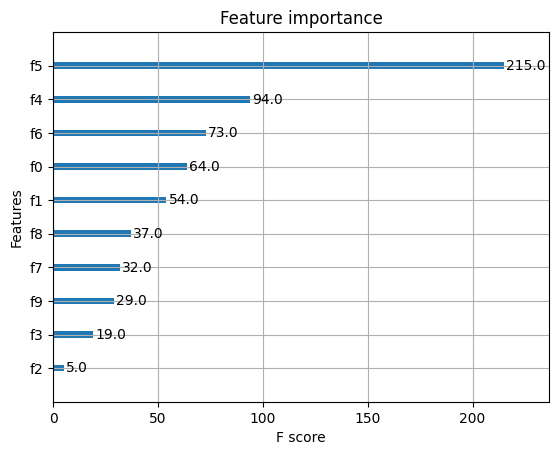

In [6]:
bdt = XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1,colsample_bytree=0.8, subsample=0.8)
bdt.fit(X_train, y_train)
preds_bdt = bdt.predict(X_test)
xgb.plot_importance(bdt)
plt.savefig("Plots/Boosting_Feature_Importance")
plt.show()

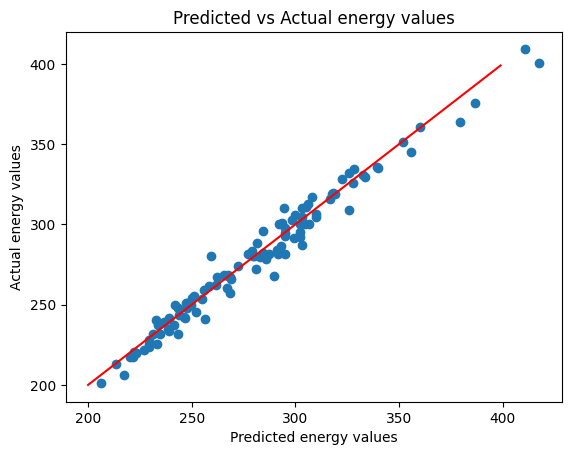

In [7]:
plt.scatter(preds_bdt, y_test)
plt.plot(np.arange(200, 400), np.arange(200,400), color= "r")
plt.xlabel('Predicted energy values') 
plt.ylabel('Actual energy values')
plt.title("Predicted vs Actual energy values")
plt.savefig("Plots/Boosting_Predicted_vs_Actual")
plt.show()

# Predicting Residuals

In [ ]:
bdt = XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1,colsample_bytree=0.8, subsample=0.8)


## Optimize Parameters